In [2]:
# 
# Feature Matching 데모 
#
# SIFT/SURF/ORB 특징검출과 기술자 생성 
# 

import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
def detect_compute(img_gray, N = -1):

    start = time.time()  # 시작 시간 저장
    kps, descs = feature2d_extractor.detectAndCompute(img_gray, None)
    print("Time:", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

    print(f"num of keypoints: {len(kps)}")

    # 3. 갯수가 너무 많아서 강한것만 N 고름 
    if N == -1:
        top_N_kps = kps
        top_N_descs = descs
    else:    
        # Sort keypoints based on their response
        kps_sorted = sorted(kps, key=lambda x: x.response, reverse=True)
        top_N_kps = kps_sorted[:N]
        # Find corresponding descriptors and indices
        top_N_descs = [descs[kps.index(kp)] for kp in top_N_kps]

    if N != -1:
        for kp, desc in zip(top_N_kps, top_N_descs):
            print("Angle:", kp.angle)        # the major orientation in angles  
            print("Class ID:", kp.class_id)  # internal parameter
            print("Octave:", kp.octave)
            print("Point:", kp.pt)           # (x, y) in original image coordinate  
            print("Response:", kp.response)  # strength of response (DOG value)
            print("Size:", kp.size)          # scale in original image 
            print("Desc:", desc)
            
    return top_N_kps, top_N_descs

Using ORB
Time: 0.01795172691345215
num of keypoints: 500
Angle: 255.70269775390625
Class ID: -1
Octave: 0
Point: (929.0, 719.0)
Response: 0.02082485519349575
Size: 31.0
Desc: [ 46 128 233 193 244  88 105 153  87 117  87 178  89 252 254 124  91 152
  55 185 159  20 236 147  78  92 129 231 183 143 212 228]
Angle: 256.4700622558594
Class ID: -1
Octave: 0
Point: (840.0, 719.0)
Response: 0.02018272504210472
Size: 31.0
Desc: [143 177 235  82 246 216 123 153  95 117  87 178 219 220 254 124  87 152
 183 221 159 148 238 146  78  93 161 229 174 143 212 117]
Angle: 267.64007568359375
Class ID: -1
Octave: 0
Point: (666.0, 748.0)
Response: 0.017755435779690742
Size: 31.0
Desc: [ 86 206 254 228 176  43 190 175  31 166 106 171 105 235  61  64 183 255
  43 176  98 216  15 159 252 254 143  69 149 250 133  10]
Angle: 290.605224609375
Class ID: -1
Octave: 0
Point: (675.0, 748.0)
Response: 0.01693611778318882
Size: 31.0
Desc: [227  13  74 199 222 135 142 119  24 170 190  74 116 183 101 224  93 127
 179  

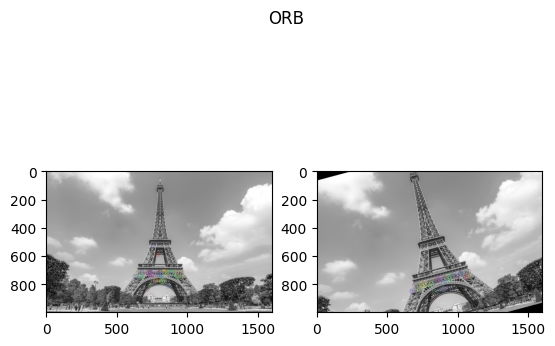

In [7]:
if __name__ == "__main__":

    
    img_file  = 'eiffel.jpg' #'sunflowers.jpg'
    img_color = cv2.imread(img_file)

    # rotation and scaling
    angle = 15 #45
    scale = 1.25 #0.75
    # Calculate rotation matrix
    height, width = img_color.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    img_rotated = cv2.warpAffine(img_color, rotation_matrix, (width, height))


    for method in ["ORB"]: #"SIFT"]: #, "ORB","SURF"]:  
        
        print("Using {}".format(method))
        
        if method == "SIFT": #  SIFT (not patent is expired 
            feature2d_extractor = cv2.xfeatures2d.SIFT_create()
        elif method == "SURF": #  SURF, license issue  
            feature2d_extractor = cv2.xfeatures2d.SURF_create()     
        elif method == "ORB":  
            feature2d_extractor = cv2.ORB_create()  
        else:
            print("Not support the Detector: ", method) 
            continue
  
        N = 100
        img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY) # 그레이 영상 이용  
        kps, desc =  detect_compute(img_gray, N)
        img_annotated = cv2.drawKeypoints(cv2.cvtColor(img_gray,cv2.COLOR_GRAY2BGR), kps, (255, 0, 0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # 0: default, 4: rich 
     
        img_gray = cv2.cvtColor(img_rotated,cv2.COLOR_BGR2GRAY) # 그레이 영상 이용  
        kps_aug, desc_aug =  detect_compute(img_gray, N)
        img_annotated_aug = cv2.drawKeypoints(cv2.cvtColor(img_gray,cv2.COLOR_GRAY2BGR), kps_aug, (255, 0, 0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # 0: default, 4: rich 
        
        plt.subplot(1,2,1), plt.imshow(img_annotated)
        plt.subplot(1,2,2), plt.imshow(img_annotated_aug)
        plt.suptitle(method)
        plt.show()
